In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# import matplotlib.cm as cm
# import sys
# sys.path.insert(0, '../src/')

# import matplotlib.cm as cm
# import jsm_stats
# import jsm_halopull
# import os

In [3]:
import sys
sys.path.insert(0, '../src/')
import jsm_halopull

In [4]:
datadir = "../../data/test_evo/12_4_0/"

number of realizations: 10
number of branches/subhalos: 1600
saving the file to be run in the MCMC machine
writing out the subhalo data
writing out the host data


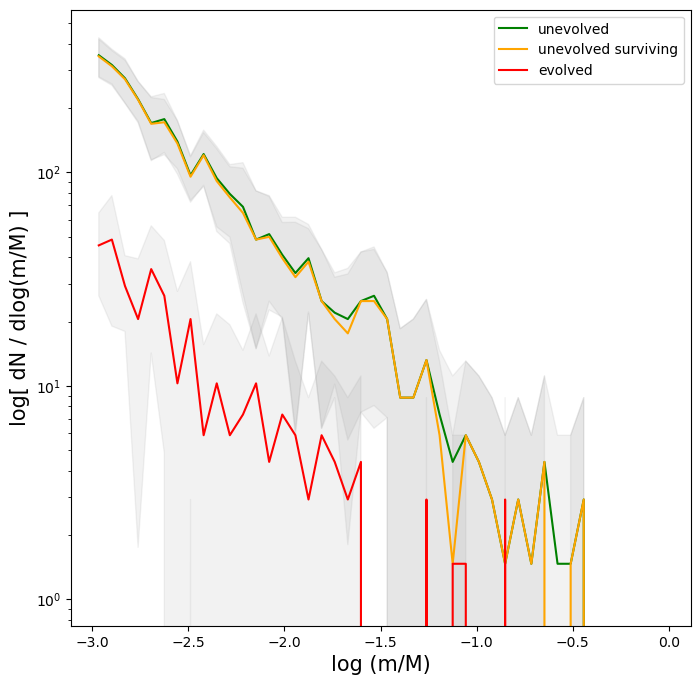

In [6]:
read = jsm_halopull.Realizations(datadir)
grab = jsm_halopull.MassMat(read.metadir, Mres=-4, Nsamp=2)

In [ ]:
grab.all_data.shape

In [ ]:
wow = np.load("../../data/test_evo/12_4_0/host_properties.npy")

In [ ]:
wow

In [ ]:
def find_nearest1(array,value):
    idx,val = min(enumerate(array), key=lambda x: abs(x[1]-value))
    return idx

def hostmass(file):
    opentree = np.load(file) #open file and read
    opentree["mass"][0,0]
    z50 = opentree["redshift"][find_nearest1(opentree["mass"][0], opentree["mass"][0,0]/2)]
    z10 = opentree["redshift"][find_nearest1(opentree["mass"][0], opentree["mass"][0,0]/10)]
    print(np.log10(opentree["mass"][0,0]), z50, z10, opentree["mass"].shape[0])

In [ ]:
hostmass("../../data/test_evo/12_4_0/tree2_evo.npz")

In [ ]:
lgMh = np.delete(opentree["mass"], 0 , axis=0)

In [ ]:
mask = opentree["order"] != -99. # converting to NaN values
test = np.where(mask, opentree["order"], np.nan)  

In [ ]:
def find_nearest1(array,value):
    idx,val = min(enumerate(array), key=lambda x: abs(x[1]-value))
    return idx

In [ ]:
plt.plot(opentree["redshift"], opentree["mass"][0])
plt.axhline(opentree["mass"][0,0]/2)
plt.axhline(opentree["mass"][0,0]/10)
plt.axvline(opentree["redshift"][find_nearest1(opentree["mass"][0], opentree["mass"][0,0]/2)])
plt.axvline(opentree["redshift"][find_nearest1(opentree["mass"][0], opentree["mass"][0,0]/10)])
plt.yscale("log")

In [ ]:
opentree["redshift"][find_nearest1(opentree["mass"][0], opentree["mass"][0,0]/2)]


In [ ]:
fig,ax=plt.subplots(figsize=(8,8))
plt.imshow(test, extent=[opentree["redshift"].min(), opentree["redshift"].max(), 1591, 0])
ax.set_aspect(1/ax.get_data_ratio(), adjustable="box")
plt.colorbar(label="order (k)")
plt.xlabel("redshift")
plt.ylabel("subhalo index")

In [ ]:
index = np.random.randint(1591, size=8)

set = np.log10(np.max(lgMh, axis=1)[index])

norm = mpl.colors.Normalize(vmin=set.min(), vmax=set.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.viridis_r)

colors = mpl.cm.viridis_r(np.linspace(0, 1, index.shape[0]))

In [ ]:
plt.figure(figsize=(8,5))
for i,val in enumerate(index):
    plt.plot(opentree["redshift"], opentree["order"][val], color=colors[i])
plt.ylim(-0.1, 5)
plt.axhline(0, ls=":", c="black")
plt.colorbar(cmap, label="log M$_\mathrm{peak}$")
plt.ylabel("order (k)")
plt.xlabel("redshift")
plt.show()

In [ ]:
opentree["order"]

maskorder = opentree["order"] != -99. # converting to NaN values
maskmass = opentree["mass"] != -99. # converting to NaN values


In [ ]:
subhalo = np.random.randint(1591, size=1)
indexs = np.argmax(opentree["mass"], axis=1)
index = indexs[subhalo]

subhalo[0]

In [ ]:
fig, axs = plt.subplots(2, sharex=True, figsize=(10,10))
for i in range(1):
    axs[0].plot(opentree["redshift"], opentree["mass"][subhalo[i]])
    axs[0].axvline(opentree["redshift"][index[i]], ls="--", color="red")
    axs[1].plot(opentree["redshift"], opentree["order"][subhalo[i]])
    axs[1].axvline(opentree["redshift"][index[i]], ls="--", color="red")

axs[1].set_ylim(0)
axs[0].set_yscale("log")
plt.show()

In [ ]:
wowo = jsm_halopull.Realizations("../../data/test_evo/12_4_0/")
wowo.grab_mass()

In [ ]:
hmm = np.load('../../data/test_evo/mass_res/host_properties.npy')
hmm

In [ ]:
test = jsm_prephalo.MassMat("../../data/test_evo/mass_res/")
test.prep_data()

In [ ]:
yep = np.linspace(7, 12, 20)

In [ ]:
plt.hist(test.lgMh_acc[0], bins=yep, alpha=0.1)
plt.hist(test.lgMh_acc_surv[0], bins=yep, alpha=0.1)
plt.hist(test.lgMh_final[0], bins=yep, alpha=0.1)

In [ ]:
wlp = jsm_halopull.Realizations("../../data/test_evo/12_4_0/")
wlp.grab_mass()

In [ ]:
woho = np.load("../../data/test_evo/12_4_0/host_properties.npy")

woho

In [ ]:
#jsm_prephalo.surviving("../../data/MW-analog/correct/") # this needs to be run first (and only once)!
arbresf = jsm_prephalo.MassMat("../../data/MW-analog/trash/correct/final_mass.npy")
arbresf.prep_data(includenan=False)

arbresf.SHMF()
arbresf.plot_SHMF()

#arbres.SAGA_break(savepath="../../data/MCMC/SAGA_samples.npy")

In [ ]:
#jsm_prephalo.surviving("../../data/MW-analog/correct/") # this needs to be run first (and only once)!
arbres = jsm_prephalo.MassMat("../../data/MW-analog/trash/correct/surv_mass.npy")
arbres.prep_data(includenan=False)

arbres.SHMF()
arbres.plot_SHMF()

#arbres.SAGA_break(savepath="../../data/MCMC/SAGA_samples.npy")

In [ ]:
arbresu = jsm_prephalo.MassMat("../../data/MW-analog/trash/correct/acc_mass.npy")
arbresu.prep_data(includenan=False)

arbresu.SHMF()
arbresu.plot_SHMF()


In [ ]:
wrong = jsm_prephalo.MassMat("../../data/MW-analog/trash/withering/surv_mass.npy")
wrong.prep_data(includenan=False)

wrong.SHMF()
wrong.plot_SHMF()

In [ ]:
plt.figure(figsize=(8, 8))


plt.plot(arbresu.phi_bincenters, arbresu.SHMF_werr[0], label="unevolved", color="green")
plt.fill_between(arbresu.phi_bincenters, y1=arbresu.SHMF_werr[0]-arbresu.SHMF_werr[1], y2=arbresu.SHMF_werr[0]+arbresu.SHMF_werr[1], alpha=0.1, color="grey")

plt.plot(arbres.phi_bincenters, arbres.SHMF_werr[0],  label="unevolved surviving", color="orange")
plt.fill_between(arbres.phi_bincenters, y1=arbres.SHMF_werr[0]-arbres.SHMF_werr[1], y2=arbres.SHMF_werr[0]+arbres.SHMF_werr[1], alpha=0.1, color="grey")

plt.plot(arbresf.phi_bincenters, arbresf.SHMF_werr[0], label="evolved", color="red")
plt.fill_between(arbresf.phi_bincenters, y1=arbresf.SHMF_werr[0]-arbresf.SHMF_werr[1], y2=arbresf.SHMF_werr[0]+arbresf.SHMF_werr[1], alpha=0.1, color="grey")

plt.yscale("log")
plt.xlabel("log (m/M)", fontsize=15)
plt.ylabel("log[ dN / dlog(m/M) ]", fontsize=15)
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(8, 8))



plt.plot(arbres.phi_bincenters, arbres.SHMF_werr[0],  label="based on $\Phi_{\mathrm{res}}$", color="orange")
plt.fill_between(arbres.phi_bincenters, y1=arbres.SHMF_werr[0]-arbres.SHMF_werr[1], y2=arbres.SHMF_werr[0]+arbres.SHMF_werr[1], alpha=0.1, color="grey")

plt.plot(wrong.phi_bincenters, wrong.SHMF_werr[0],  label="based on M$_{\mathrm{floor}}$", color="black", ls=":")
plt.fill_between(wrong.phi_bincenters, y1=wrong.SHMF_werr[0]-wrong.SHMF_werr[1], y2=wrong.SHMF_werr[0]+wrong.SHMF_werr[1], alpha=0.1, color="grey")


plt.yscale("log")
plt.xlabel("log (m/M)", fontsize=15)
plt.ylabel("log[ dN / dlog(m/M) ]", fontsize=15)
plt.legend()
plt.show()


In [ ]:
acc = np.load("../../data/MW-analog/correct/acc_mass.npy")

final = np.load("../../data/MW-analog/correct/final_mass.npy")

In [ ]:
mask = final > 1e8

In [ ]:
hmm = np.ma.filled(np.ma.masked_array(acc, mask=~mask),fill_value=np.nan)

In [ ]:
np.save("../../data/MW-analog/confused/floor_crit.npy", hmm)

In [ ]:
wrong = jsm_prephalo.MassMat("../../data/MW-analog/confused/floor_crit.npy")
wrong.prep_data(includenan=True)

wrong.SHMF()
wrong.plot_SHMF()

In [ ]:
test = jsm_halopull.Realizations("../../data/test_evo/mass_res/", 1e8)
test.grab_mass()

In [ ]:
data = np.log10(test.acc_mass[1][test.surv_mask[1]])

In [ ]:
data_bad = np.log10(test.acc_mass[0][test.surv_mask[0]])

In [ ]:
plt.hist(data, color="orange")
plt.hist(data_bad, color="grey")

In [ ]:
data_dir = "../../data/MW-analog/trash/correct/"

acc_mass = np.load(data_dir+"acc_mass.npy")
acc_red = np.load(data_dir+"acc_redshift.npy")
final_mass = np.load(data_dir+"final_mass.npy")
#final_coords = np.load(data_dir+"final_coord.npy")

print(acc_mass.shape)
mask = acc_mass[:,0] == 1e12 # only exactly the same host halo mass, also clears dead runs
acc_mass = acc_mass[mask]
final_mass = final_mass[mask]
acc_red = acc_red[mask]

In [ ]:
test = np.load("../../data/test_evo/mass_res/final_coord.npy")

In [ ]:
mask

In [ ]:
test[np.array([True, True, False, False, False])].shape

In [ ]:
data_dir = "../../data/MW-analog/trash/correct/"

clean_host = True
include_nan = False
mass_res = -3

acc_mass = np.load(data_dir+"acc_mass.npy")
acc_red = np.load(data_dir+"acc_redshift.npy")
final_mass = np.load(data_dir+"final_mass.npy")
#final_coords = np.load(data_dir+"final_coord.npy")

Mhosts = np.nanmax(acc_mass, axis=1)

acc_mass = np.delete(acc_mass, 0, axis=1) # removing the host from the data
acc_red = np.delete(acc_red, 0, axis=1)
final_mass = np.delete(final_mass, 0, axis=1)
#final_coords = np.delete(final_coords, 0, axis=1)

if clean_host == True:
    mask = Mhosts == 1e12 # only exactly the same host halo mass, also clears dead runs
    lgMh_acc = acc_mass[mask]
    lgMh_final = final_mass[mask]
    acc_red = acc_red[mask]


surv_mask = np.log10(final_mass/acc_mass) > mass_res # now selecting only the survivers
acc_surv_mass = np.ma.filled(np.ma.masked_array(acc_mass, mask=~surv_mask),fill_value=np.nan)

lgMh_acc = np.log10(acc_mass)
lgMh_final = np.log10(final_mass)
lgMh_acc_surv = np.log10(acc_surv_mass)

acc_phi = np.log10((acc_mass.T / Mhosts).T)  
final_phi = np.log10((final_mass.T / Mhosts).T) 
acc_surv_phi = np.log10((acc_surv_mass.T / Mhosts).T) 

In [ ]:
acc_phi = np.log10((acc_mass.T / Mhosts).T)  
final_phi = np.log10((final_mass.T / Mhosts).T) 
acc_surv_phi = np.log10((acc_surv_mass.T / Mhosts).T) 

In [ ]:
lgMh = -np.sort(-lgMh) # need to be careful about this with the associated reshift array!!!

In [ ]:
max_sub = min(lgMh.shape[1] - np.sum(np.isnan(lgMh),axis=1))
print(max_sub)

lgMh = lgMh[:,1:max_sub]  #excluding the host masslgMh = lgMh


In [ ]:
plt.hist(galhalo.lgMs_B13(np.min(lgMh, axis=1)))

In [ ]:
plt.imshow(lgMh)

In [ ]:
lgMs = galhalo.lgMs_RP17(lgMh)

In [ ]:
index, counts = np.unique(lgMs, return_counts=True)

In [ ]:
max(index)

In [ ]:
def pdf(data):
    index, counts = np.unique(data, return_counts=True)
    full = np.zeros(200) # the max number of unique counts across the models
    full[index.astype("int")] = counts/data.shape[0]
    return full

In [ ]:
max(jsm_stats.satfreq(lgMs, 6.5))

In [ ]:
wow = jsm_halopull.Realizations("../../data/test_evo/mass_res/")
wow.grab_mass()
wow.plot_single_realization(nhalo=15,rand=False)

In [ ]:
acc_phi_counts = np.apply_along_axis(differential, 1, self.acc_phi, phi_bins=self.phi_bins, phi_binsize=self.phi_binsize) 

acc_phi_SHMF_ave = np.average(acc_phi_counts, axis=0)
acc_phi_SHMF_std = np.std(acc_phi_counts, axis=0)

self.acc_SHMF_counts = acc_phi_counts
self.acc_surv_SHMF_werr = np.array([acc_phi_SHMF_ave, acc_phi_SHMF_std])